In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from model import read_data,train

In [2]:
P = 50; Q = 50; J = 100
num_epochs = 50; batch_size = 5; hidden_size = 1; learning_rate = 0.01; loss_type = "L1"
dates_split,K,V,Y = read_data(P,Q,J)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0, Loss: 0.885, S:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Epoch 1, Loss: 0.887, S:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Epoch 2, Loss: 0.863, S:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Epoch 3, Loss: 0.856, S:[0.0, 0.528, 0.0, 0.0, 0.0, 0.0]
Epoch 4, Loss: 0.837, S:[0.0, 0.528, 0.0, 0.0, 0.0, 0.0]
Epoch 5, Loss: 0.84, S:[0.0, 0.528, 0.587, 0.0, 0.0, 0.0]
Epoch 6, Loss: 0.826, S:[0.0, 0.528, 0.587, 0.0, 0.0, 0.0]
Epoch 7, Loss: 0.817, S:[0.554, 0.528, 0.587, 0.0, 0.552, 0.0]
Epoch 8, Loss: 0.804, S:[0.554, 0.528, 0.587, 0.593, 0.552, 0.0]
Epoch 9, Loss: 0.801, S:[0.554, 0.528, 0.587, 0.593, 0.552, 0.556]
Epoch 10, Loss: 0.777, S:[0.554, 0.528, 0.587, 0.593, 0.552, 0.556]
Epoch 11, Loss: 0.745, S:[0.554, 0.528, 0.587, 1.12, 0.552, 0.556]
Epoch 12, Loss: 0.741, S:[0.554, 0.528, 0.587, 1.12, 0.552, 0.556]
Epoch 13, Loss: 0.723, S:[0.554, 0.528, 0.587, 1.12, 0.552, 1.114]
Epoch 14, Loss: 0.712, S:[0.554, 0.528, 0.587, 1.12, 0.552, 1.114]
Epoch 15, Loss: 0.697, S:[0.554, 0.528, 0.587, 1.12, 0.552, 1.114]
Epoch 

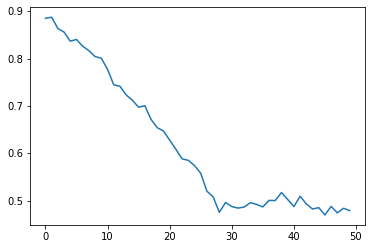

In [3]:
model1,loss_history1 = train("GRU",K,V,Y,dates_split,num_epochs,batch_size,hidden_size,learning_rate,loss_type)
plt.plot(loss_history1)

In [13]:
name = pd.read_csv("Y_bert.csv",index_col=0).columns.values[:J]

In [16]:
torch.save(model1.state_dict(),"model.pth")
result1 = pd.DataFrame(model1.S.detach().numpy()).T
result1.index = name
result1.to_csv("s.csv")
pd.DataFrame(loss_history1).to_csv("loss.csv")